# Proyecto Pima Indians Diabetes Database

Este data set proviene del Instituto Nacional de Diabetes y Enfermedades digestivas y Renales, el cual tiene por objetivo predecir de forma diagnóstica si un paciente tiene o no diabetes.
Dentro de las restricciones que se tienen es que todas las pacientes son mujeres de al menos 21 años de herencia indígena pima.
Las variables que hacen parte del data set son:
- Número de embarazos
- Glucose: Glucosa
- BloodPressure: Presión arterial
- SkinThickness: Grosor de la piel
- Insuline. Insulina
- BMI: Indice de masa corporal
- DiabetesPedigreeFunction: Funcion que califica la probabilidad de diabetes en función de los antecedentes familiares.
- Age: Edad en años
- Outcome: Variable objetivo, 1 Diabético y 0 No diabéditco.


https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [1]:
# importación de librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Dataset Information

En esta sección se explora:
- Tamaño del data set
- Nombre de las columnas
- Tipo de datos
- Estadisticas principales

In [2]:
# carga de datos
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# tamaño del archivo
data.shape

(768, 9)

In [6]:
# nombre de las columnas
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# información de cada tipo de dato
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# revisar nulos 
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Los datos no tienen nulos

In [11]:
# principales estadisticas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Se puede observar que hay las variables Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI y Outcome tienen valores en cero, lo cuál solo es válido para las variables Pregnancies y Outcome.

In [12]:
# valores unicos de cada variable categorica
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

Se asurmirá que una variable es categorica si tiene 6 o menos valores únicos. Para este caso solo la varible Outcome es categórica. 

## Exploración del data set

In [9]:
# Se divide el dataset en variables categóricas y numéricas 
variablesCategoricas = []
variablesNumericas = []
for k,i in data.nunique().to_dict().items():
    if i > 6:
        variablesNumericas.append(k)
    else:
        variablesCategoricas.append(k)

print("Las variables categoricas son: ", *variablesCategoricas)
print("Las variables numericas son: ", *variablesNumericas)

Las variables categoricas son:  Outcome
Las variables numericas son:  Pregnancies Glucose BloodPressure SkinThickness Insulin BMI DiabetesPedigreeFunction Age


Text(0.5, 1.0, 'Distribution : Outcome')

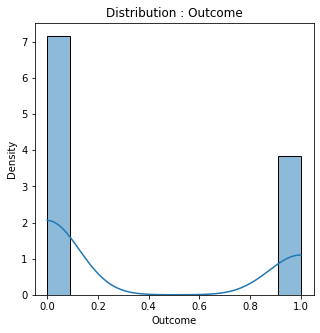

In [10]:
# Impresión de la distribución de la variable categórica
plt.figure(figsize = (5,5))
sns.histplot(data[variablesCategoricas[0]], stat='density', kde=True)
title = 'Distribution : ' + variablesCategoricas[0]
plt.title(title)

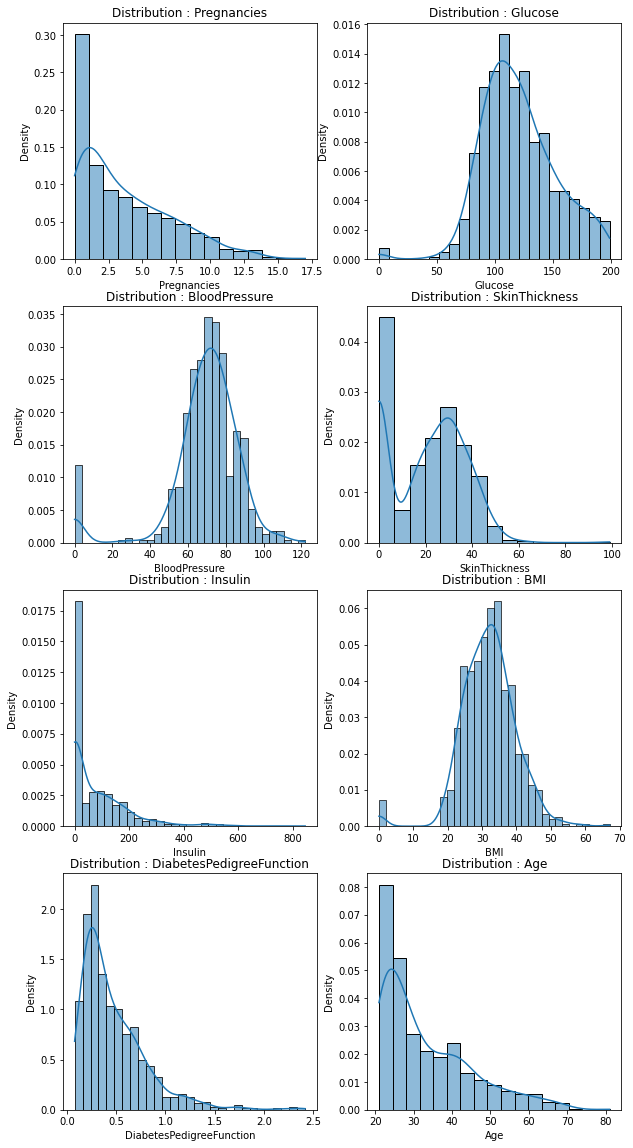

In [92]:
# impresión de la distribución de las variables númericas
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,20))
for i in range(len(variablesNumericas)):
    plt.subplot(4,2,i+1)
    sns.histplot(data[variablesNumericas[i]], stat='density', kde=True)
    title = 'Distribution : ' + variablesNumericas[i]
    plt.title(title)
plt.show()

- Glucosa y BMI muestran una distribución normal con un pequeño pico en los ceros.
- BloodPressure y SkinThickness muestran una distribución bimodal.
- Pregnacies, Insulin, DiabetesPedigreeFunction y Age muestran una distribución sesgada hacia la derecha.

### Visualización de la variable objetivo Outcome

In [4]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

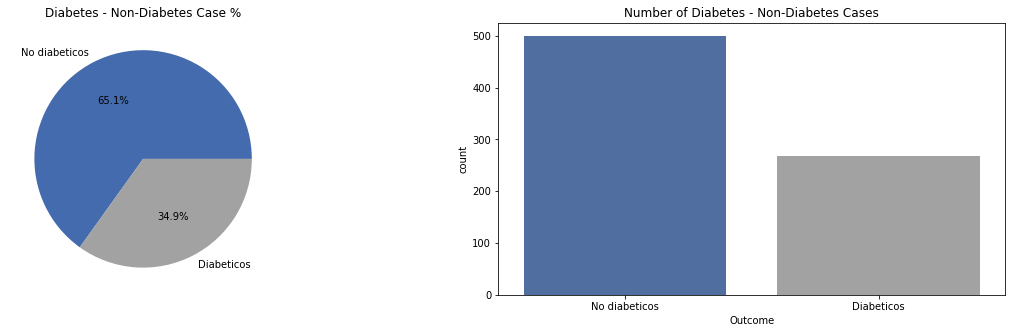

In [5]:
colors = ['#446BAD','#A2A2A2']
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
labels = ['No diabeticos', 'Diabeticos']
colors = sns.color_palette(colors)
plt.pie(data["Outcome"].value_counts(), labels=labels, colors=colors, autopct='%0.1f%%')
plt.title('Diabetes - Non-Diabetes Case %')

plt.subplot(1,2,2)
ax = sns.countplot(x=data["Outcome"],
    palette=colors)
ax.set_xticklabels(['No diabeticos', 'Diabeticos'])
plt.title('Number of Diabetes - Non-Diabetes Cases')
plt.show()

Los datos estan desbalanceados, los no diabeticos tienen casi el doble de casos.

## Preprocessing

### Reemplazar datos nulos

Según se observó en la descripción estadística las variables Glucose, BloodPressure, SkinThickness, Insulin, BMI tenian valores en cero.

In [6]:
# se crea una copia del data set y se reemplazan los 0 por NA
diabetes_data_copy = data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

diabetes_data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
# Se rellenan los NA con el promedio de cada columna 
# las distribuciones normales se reemplazan por la media. (La media se utiliza para distribuciones normales de números, 
# con una cantidad baja de valores atípicos.)
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].mean(), inplace = True)

# las distribuciones bimodales se reemplazan por la mediana. (La mediana se utiliza generalmente para devolver la tendencia 
# central en el caso de distribuciones numéricas sesgadas.)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].median(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)


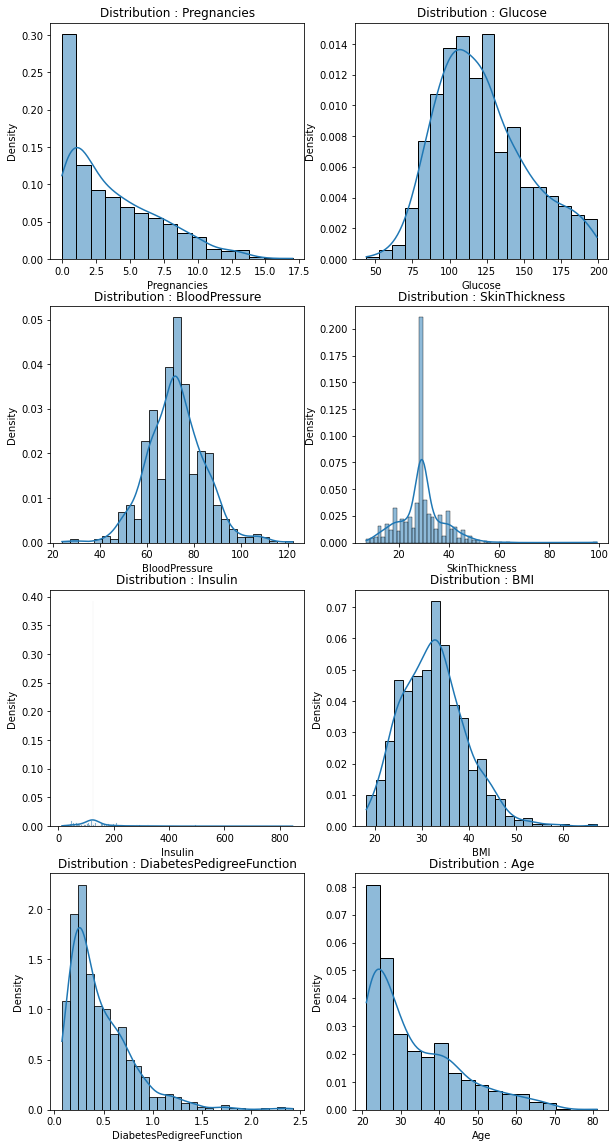

In [11]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,20))
for i in range(len(variablesNumericas)):
    plt.subplot(4,2,i+1)
    sns.histplot(diabetes_data_copy[variablesNumericas[i]], stat='density', kde=True)
    title = 'Distribution : ' + variablesNumericas[i]
    plt.title(title)
plt.show()

Las distribución de las datos muestran un cambio después de eliminar los nulos.

### Estandarizando los datos

In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() # Standardization

diabetes_data_copy['Pregnancies'] = ss.fit_transform(diabetes_data_copy[['Pregnancies']])
diabetes_data_copy['Insulin'] = ss.fit_transform(diabetes_data_copy[['Insulin']])
diabetes_data_copy['DiabetesPedigreeFunction'] = ss.fit_transform(diabetes_data_copy[['DiabetesPedigreeFunction']])
diabetes_data_copy['Age'] = ss.fit_transform(diabetes_data_copy[['Age']])
diabetes_data_copy['BloodPressure'] = ss.fit_transform(diabetes_data_copy[['BloodPressure']])
diabetes_data_copy['SkinThickness'] = ss.fit_transform(diabetes_data_copy[['SkinThickness']])
diabetes_data_copy['Glucose'] = ss.fit_transform(diabetes_data_copy[['Glucose']])
diabetes_data_copy['BMI'] = ss.fit_transform(diabetes_data_copy[['BMI']])
diabetes_data_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.031990,0.670643,-0.181541,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.528319,-0.012301,-0.181541,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.693761,-0.012301,-0.181541,-1.332833,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.528319,-0.695245,-0.540642,-0.634212,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.679076,0.670643,0.316566,1.548980,5.484909,-0.020496,1


### Matriz de correlación

<AxesSubplot:>

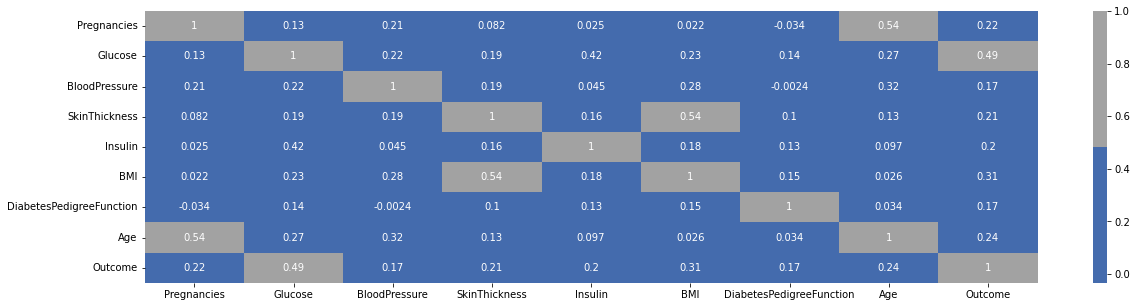

In [47]:
plt.figure(figsize = (20,5))
sns.heatmap(diabetes_data_copy.corr(),cmap = colors,annot = True)

Text(0.5, 1.0, 'Correlation w.r.t Outcome')

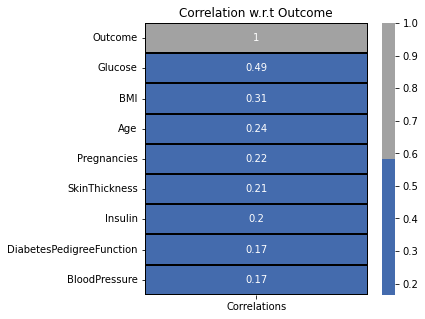

In [48]:
corr = diabetes_data_copy.corrwith(diabetes_data_copy['Outcome']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome')

### Balanceando los datos

In [40]:
# se asigna la columna Outcome a la variable y
y = diabetes_data_copy["Outcome"]

In [41]:
# se crea una copia
X = diabetes_data_copy.copy()

In [42]:
# se borra la columna outcome (dependiente) 
X.drop(["Outcome"], axis=1, inplace=True)

In [99]:
# se balancean los datos
from imblearn.over_sampling import SMOTE
sm =SMOTE()
X_res, y_res =sm.fit_resample(X,y)

In [100]:
y_res.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

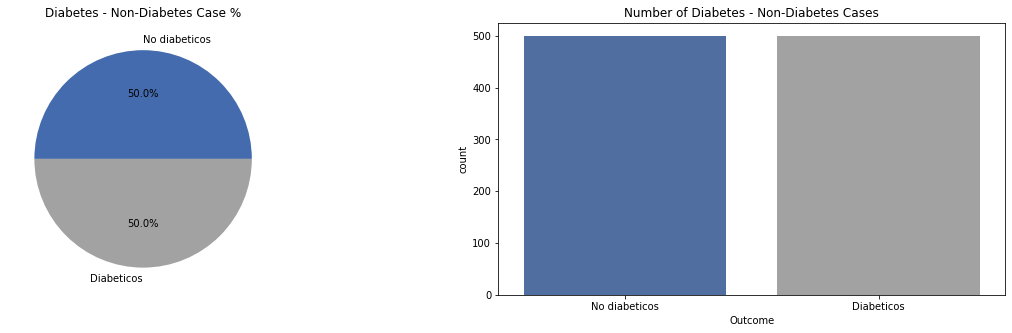

In [101]:
# dibujar los datos
colors = ['#446BAD','#A2A2A2']
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
labels = ['No diabeticos', 'Diabeticos']
colors = sns.color_palette(colors)
plt.pie(y_res.value_counts(), labels=labels, colors=colors, autopct='%0.1f%%')
plt.title('Diabetes - Non-Diabetes Case %')

plt.subplot(1,2,2)
ax = sns.countplot(x=y_res,
    palette=colors)
ax.set_xticklabels(['No diabeticos', 'Diabeticos'])
plt.title('Number of Diabetes - Non-Diabetes Cases')
plt.show()

### División de los datos

In [109]:
# datos balanceados
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X_res,
        y_res,
        test_size=0.2,
        random_state=12345,
    )

In [103]:
# datos desbalanceados
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(
        X,
        y,
        test_size=0.2,
        random_state=12345,
    )

## Modelo

In [114]:
# modelo para los datos con clases balanceadas

from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

pipeline = Pipeline(
        steps=[
            ("onehot", OneHotEncoder(handle_unknown='ignore')),
            ("clasificador", LogisticRegressionCV(Cs=10, random_state=0)
            ),
        ],
    )

In [115]:
# modelo para los datos con clases desbalanceadas y haciendo uso de StratifiedKFold 
# que conserva de la muestra el porcentaje de cada clase, en este caso 2:1, y es utilizado para este tipo de casos.

from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=4)

pipeline1 = Pipeline(
        steps=[
            ("onehot", OneHotEncoder(handle_unknown='ignore')),
            ("clasificador", LogisticRegressionCV(Cs=10, cv=skf, random_state=0)
            ),
        ],
    )

In [111]:
def get_metrics(clf, X_train, y_train, X_test, y_test):
    """Esta función calcula metricas y graficas para
    mostrar el desempeño del modelo, ademas retorna un diccionario
    con las metricas mas importantes
    """
    print()
    print("********************************************************************")
    print("******************  METRICAS EN DATASET DE TRAIN     ***************")
    print("********************************************************************")
    print()
    y_pred_train = clf.predict(X_train)
    cm_train = confusion_matrix(y_train, y_pred_train, normalize="true").round(2)
    
    print(classification_report(y_train,y_pred_train)) 
    plt.figure(figsize=(4,3))
    sns.heatmap(cm_train, annot = True, cmap=plt.cm.Blues,fmt='g')
    plt.title("Matriz de confusion dataset train")
    plt.show()
                                                       
    
    print()
    print("********************************************************************")
    print("******************  METRICAS EN DATASET DE TEST     ****************")
    print("********************************************************************")
    print()
    y_pred_test = clf.predict(X_test)
    cm_test = confusion_matrix(y_test, y_pred_test, normalize="true").round(2)
    
    print(classification_report(y_test,y_pred_test))      
    plt.figure(figsize=(4,3))
    sns.heatmap(cm_test, annot = True, cmap=plt.cm.Blues,fmt='g')
    plt.title("Matriz de confusion dataset test")
    plt.show()

### Datos con clases balanceadas

In [116]:
# Entrenamiento del pipeline con los datos de entrenamiento.

pipeline.fit(X_train, y_train)

Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore')),
                ('clasificador', LogisticRegressionCV(random_state=0))])


********************************************************************
******************  METRICAS EN DATASET DE TRAIN     ***************
********************************************************************

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       1.00      1.00      1.00       394

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



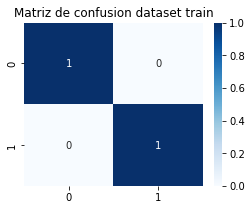


********************************************************************
******************  METRICAS EN DATASET DE TEST     ****************
********************************************************************

              precision    recall  f1-score   support

           0       0.73      0.82      0.77        94
           1       0.82      0.74      0.78       106

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.78       200



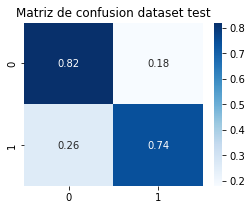

In [117]:
metricas_datos_balanceados = get_metrics(pipeline, X_train, y_train, X_test, y_test)

- De la matriz de confusión se observa que hay un sobreentramiento con los datos train.
- Para los datos de test el modelo tiene problemas con los falsos negativos pues está clasificando a las pacientes que tienen diabetes como si no lo fueran, cerca del 26%.
- Debido al aumento de los datos la precisión no es adecuada para evaluar el modelo.

### Datos sin balancear las clases

In [120]:
# Entrene el pipeline con los datos de entrenamiento.
# Datos desbalanceados
pipeline1.fit(X_train1, y_train1)

Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore')),
                ('clasificador',
                 LogisticRegressionCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
                                      random_state=0))])


********************************************************************
******************  METRICAS EN DATASET DE TRAIN     ***************
********************************************************************

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       394
           1       0.94      0.94      0.94       220

    accuracy                           0.96       614
   macro avg       0.95      0.95      0.95       614
weighted avg       0.96      0.96      0.96       614



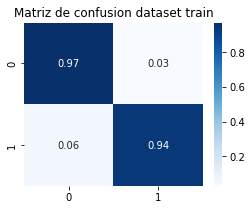


********************************************************************
******************  METRICAS EN DATASET DE TEST     ****************
********************************************************************

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       106
           1       0.89      0.71      0.79        48

    accuracy                           0.88       154
   macro avg       0.89      0.84      0.85       154
weighted avg       0.88      0.88      0.88       154



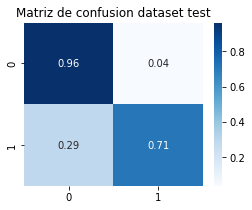

In [121]:
metricas_datos_desbalanceados = get_metrics(pipeline, X_train1, y_train1, X_test1, y_test1)

- De la matriz de confusión se observa que para los datos de train en general el modelo hizo una buena clasificación.
- Para los datos de test hay un aumento considerable en los falsos negativos pues pasó del 6% en train al 29% en test.
- El modelo también presenta problemas con los falsos negativos.

## Conclusión

- Agregar datos para balancear las clases generó overfitting o sobreajuste.
- Tanto para los datos con las clases balanceadas como con las clases desbalanceadas hay problemas con los falsos negativos.
- Se prefiere usar la técnica StratifiedKFold para los datos con clases desbalanceadas.


## Créditos

- https://www.kaggle.com/code/tanmay111999/diabetes-classification-xgb-lgbm-stack-smote#Conclusion
- https://www.kaggle.com/code/amrelsaee258/ann-diabetes-classification
- https://jdvelasq.github.io/courses/notebooks/sklearn_model_selection_and_evaluation/1-06_particioinamiento_con_clases_mal_balanceadas.html